In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

In [48]:
#load data
data = pd.read_pickle('data_cleaned.pkl')


In [49]:
pn_instruments = ['apc','dc_2sm','dc_sn008','dc_sn010']

pn_data =data[data.measurement_instrument.isin(pn_instruments)]



In [7]:
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid')
# instrument_colors = {'apc': 'tab:blue',
#                      'dc_sn008':'tab:orange',
#                      'dc_sn010': 'tab:red',
#                      'dc_2sm': 'tab:cyan',
#                      'smps': 'tab:purple',
#                      'eeps':'tab:olive'}
palette = ['tab:blue','tab:red','tab:cyan','tab:orange']
rc('font',**{'family':'serif','size':14})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

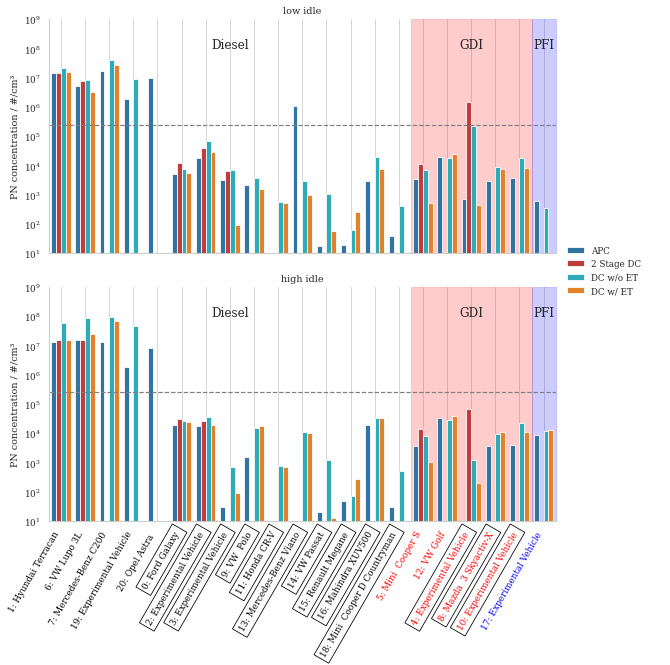

In [8]:
g = sns.catplot(kind ='bar',x = 'vehicle_name_paper',y ='c_mean',row = 'mode',hue = 'measurement_instrument',palette = palette,data = pn_data.sort_values(['combustion_type','particle_filter']), height=4, aspect=10/5)
plt.yscale('log')
g.set_xticklabels(rotation=60,horizontalalignment = 'right',verticalalignment = 'top')
g.set(xlabel = '',ylabel = 'PN concentration / #/cm³')


g.axes[0][0].set_title('low idle')
g.axes[1][0].set_title('high idle')

colors ={'Diesel':'black','Gasoline DI':'red', 'Gasoline PFI':'blue'}
box_on = {1:'black',0:'none'}
for n in range(2):
    g.axes[n][0].grid(axis = 'both')
    g.axes[n][0].fill_between([14.5,19.5],[1e-1,1e-1],[1e9,1e9],color = 'red',alpha = 0.2)
    g.axes[n][0].fill_between([19.5,20.5],[1e-1,1e-1],[1e9,1e9],color = 'blue',alpha = 0.2)
    g.axes[n][0].text(7,1e8,'Diesel', horizontalalignment = 'center',fontsize =12)
    g.axes[n][0].text(17,1e8,'GDI', horizontalalignment = 'center',fontsize =12)
    g.axes[n][0].text(20,1e8,'PFI', horizontalalignment = 'center',fontsize =12)
    
    g.axes[n][0].plot([-1,21],[250000,250000],'--',label = 'DPF division line', color = 'tab:grey')
    
    ticks = g.axes[n][0].get_xticklabels()
    for k,tick in enumerate(ticks):
        v_id = g.data.vehicle_id.unique()[k]
        tick.set_color(colors[g.data[g.data.vehicle_id ==  v_id].loc[:,'combustion_type'].unique()[0]])
        pf = g.data[g.data.vehicle_id == v_id].loc[:,'particle_filter'].unique()[0]
        tick.set_bbox(dict(facecolor = 'none',edgecolor = box_on[pf]))
        
new_labels = ['APC','2 Stage DC','DC w/o ET','DC w/ ET']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.set(ylim = (1e1,1e9),xlim=(-0.5,20.5))
g._legend.set_title('')
g._legend._set_loc((0.84,0.55))


plt.savefig('../PN_plot_revision.pdf',bbox_inches = 'tight')

In [84]:
g.axes[0][0].get_xticks()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [31]:
g._legend._get_loc()

7

# plot for presentation

In [72]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
# instrument_colors = {'apc': 'tab:blue',
#                      'dc_sn008':'tab:orange',
#                      'dc_sn010': 'tab:red',
#                      'dc_2sm': 'tab:cyan',
#                      'smps': 'tab:purple',
#                      'eeps':'tab:olive'}
palette = ['tab:blue','tab:red','tab:cyan','tab:orange']
# rc('font',**{'family':'serif','size':14})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

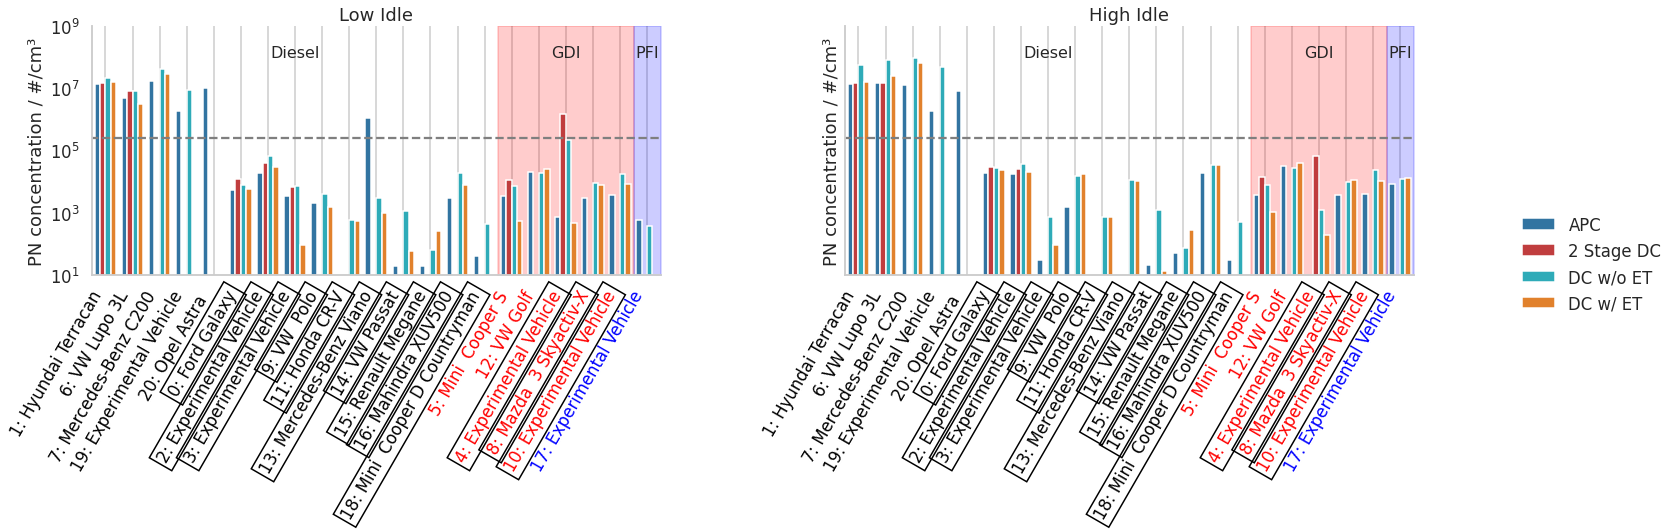

In [75]:
g = sns.catplot(kind ='bar',x = 'vehicle_name_paper',y ='c_mean',col = 'mode',hue = 'measurement_instrument',palette = palette,data = pn_data.sort_values(['combustion_type','particle_filter']), height=5, aspect=10/5)
plt.yscale('log')
g.set_xticklabels(rotation=60,horizontalalignment = 'right',verticalalignment = 'top')
g.set(xlabel = '',ylabel = 'PN concentration / #/cm³')


g.axes[0][0].set_title('Low Idle')
g.axes[0][1].set_title('High Idle')

colors ={'Diesel':'black','Gasoline DI':'red', 'Gasoline PFI':'blue'}
box_on = {1:'black',0:'none'}
for n in range(2):
    g.axes[0][n].grid(axis = 'both')
    g.axes[0][n].fill_between([14.5,19.5],[1e-1,1e-1],[1e9,1e9],color = 'red',alpha = 0.2)
    g.axes[0][n].fill_between([19.5,20.5],[1e-1,1e-1],[1e9,1e9],color = 'blue',alpha = 0.2)
    g.axes[0][n].text(7,1e8,'Diesel', horizontalalignment = 'center',fontsize =16)
    g.axes[0][n].text(17,1e8,'GDI', horizontalalignment = 'center',fontsize =16)
    g.axes[0][n].text(20,1e8,'PFI', horizontalalignment = 'center',fontsize =16)
    
    g.axes[0][n].plot([-1,21],[250000,250000],'--',label = 'DPF division line', color = 'tab:grey')
    
    ticks = g.axes[0][n].get_xticklabels()
    for k,tick in enumerate(ticks):
        v_id = g.data.vehicle_id.unique()[k]
        tick.set_color(colors[g.data[g.data.vehicle_id ==  v_id].loc[:,'combustion_type'].unique()[0]])
        pf = g.data[g.data.vehicle_id == v_id].loc[:,'particle_filter'].unique()[0]
        tick.set_bbox(dict(facecolor = 'none',edgecolor = box_on[pf]))
        
new_labels = ['APC','2 Stage DC','DC w/o ET','DC w/ ET']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.set(ylim = (1e1,1e9),xlim=(-0.5,20.5))
g._legend.set_title('')
# g._legend._set_loc((0.84,0.55))


plt.savefig('../PN_plot_presentation.png',bbox_inches = 'tight',dpi = 250)

# Example plot presentation

In [2]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
# instrument_colors = {'apc': 'tab:blue',
#                      'dc_sn008':'tab:orange',
#                      'dc_sn010': 'tab:red',
#                      'dc_2sm': 'tab:cyan',
#                      'smps': 'tab:purple',
#                      'eeps':'tab:olive'}
palette = ['tab:blue','tab:red','tab:cyan','tab:orange']
rc('font',**{'family':'sans','size':14})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

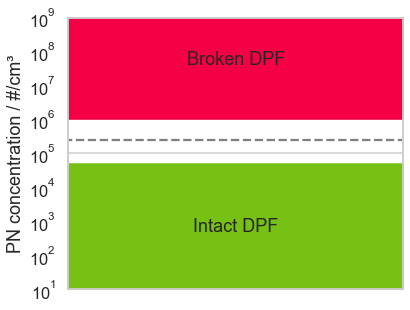

In [3]:
ems_color = (118/255,193/255,19/255)
tug_color = (246/255,0,69/255)

fig,ax = plt.subplots(figsize = (6,5))

ax.set_yscale('log')
ax.set_ylim([1e1,1e9])
ax.set_xlim([0,20])
ax.plot([-1,21],[250000,250000],'--',label = 'DPF division line', color = 'tab:grey')
ax.fill_between([-1,21],[1,1],[5e4,5e4],color = ems_color)
ax.fill_between([-1,21],[1e6,1e6],[5e10,5e10],color = tug_color)
ax.set_ylabel('PN concentration / #/cm³')
ax.set_xticks([])
ax.set_yticks(10**np.linspace(1,9,9))
ax.text(10,4e7,'Broken DPF',horizontalalignment = 'center',fontsize = 18)
ax.text(10,5e2,'Intact DPF',horizontalalignment = 'center',fontsize = 18)
plt.savefig('../example_plot.jpeg',bbox_inches = 'tight',dpi = 300)